In [42]:
# Importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [43]:
# Importing the dataset
df = pd.read_csv('PJME_hourly.csv')
df.head()

,Datetime,PJME_MW
0,2002-12-31 01:00:00,26498.0
1,2002-12-31 02:00:00,25147.0
2,2002-12-31 03:00:00,24574.0
3,2002-12-31 04:00:00,24393.0
4,2002-12-31 05:00:00,24860.0


In [44]:
# Display the first 5 rows of the DataFrame
print("Head of the DataFrame:")
display(df.head())

# Display the last 5 rows of the DataFrame
print("\nTail of the DataFrame:")
display(df.tail())

Head of the DataFrame:


,Datetime,PJME_MW
0,2002-12-31 01:00:00,26498.0
1,2002-12-31 02:00:00,25147.0
2,2002-12-31 03:00:00,24574.0
3,2002-12-31 04:00:00,24393.0
4,2002-12-31 05:00:00,24860.0



Tail of the DataFrame:


,Datetime,PJME_MW
145361,2018-01-01 20:00:00,44284.0
145362,2018-01-01 21:00:00,43751.0
145363,2018-01-01 22:00:00,42402.0
145364,2018-01-01 23:00:00,40164.0
145365,2018-01-02 00:00:00,38608.0


In [45]:
# Getting an idea about the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145366 entries, 0 to 145365
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Datetime  145366 non-null  object 
 1   PJME_MW   145366 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.2+ MB


In [46]:
# Converting 'Datetime' column to correct data type
df['Datetime'] = pd.to_datetime(df['Datetime'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145366 entries, 0 to 145365
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   Datetime  145366 non-null  datetime64[ns]
 1   PJME_MW   145366 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.2 MB


In [47]:
# Setting the 'Datetime' column as index
df.set_index('Datetime', inplace = True)
df.head()

,PJME_MW
Datetime,
2002-12-31 01:00:00,26498.0
2002-12-31 02:00:00,25147.0
2002-12-31 03:00:00,24574.0
2002-12-31 04:00:00,24393.0
2002-12-31 05:00:00,24860.0


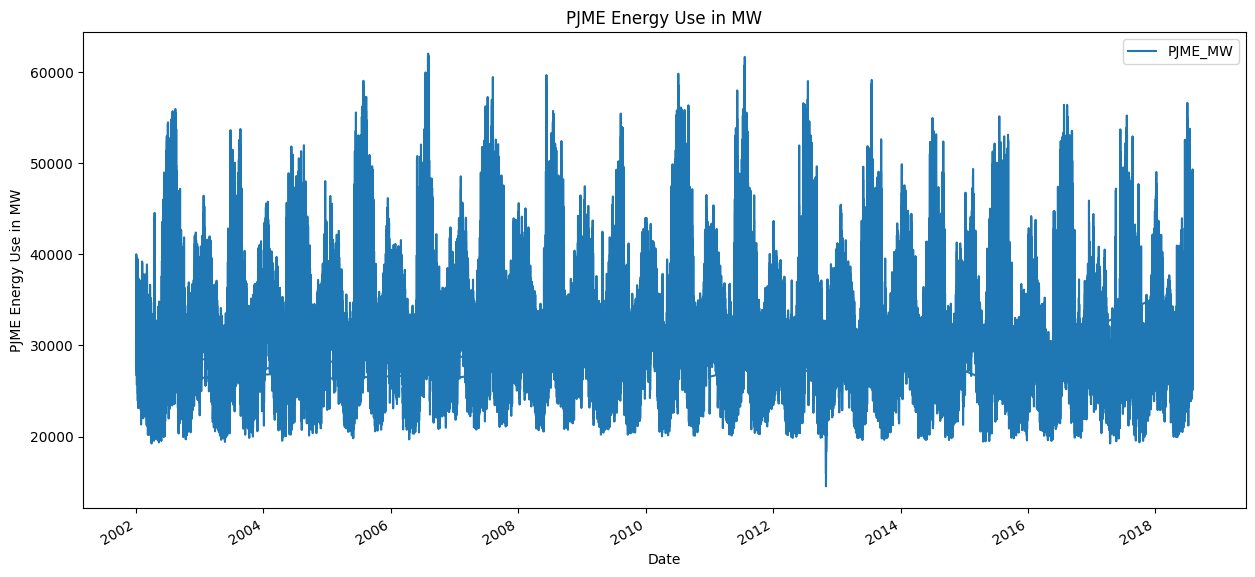

In [48]:
# Plot
df.plot(figsize = (15, 7), title = 'PJME Energy Use in MW')
plt.xlabel('Date')
plt.ylabel('PJME Energy Use in MW')
plt.show()

The plot displays the time series of PJME energy use in megawatts (MW) from around 2002 to 2018.

### Summary:

- The energy consumption exhibits a **consistent pattern of high variability** throughout the years.
- There are **recurring peaks and troughs** indicating short-term fluctuations, likely driven by daily or weekly cycles.
- The **overall level of energy use** appears relatively stable over the years, with no clear long-term upward or downward trend.
- The fluctuations seem to follow a **seasonal or periodic pattern**, with regular spikes, possibly corresponding to seasonal peaks and operational variations.

### Business and Operational Implications:

- The high variability suggests the need for **flexible resource management** to handle peak consumption periods.
- The stability in overall consumption levels indicates no major growth or decline trend, which helps in long-term capacity planning.
- Recognizing the periodic spikes can improve **grid management and energy distribution** strategies, ensuring reliability during peak times.

### Overall:
The energy use data demonstrates a stable but highly fluctuating pattern over the years with regular seasonal or cyclic peaks, highlighting the importance of dynamic planning and responsive operations.

In [49]:
# Extracting features
df['year'] = [x for x in df.index.year]
df['month'] = [x for x in df.index.month]
df = df.reset_index()
df['week'] = df['Datetime'].apply(lambda x : x.week)
df = df.set_index('Datetime')
df['day'] = [x for x in df.index.day]
df['hour'] = [x for x in df.index.hour]
df['day_str'] = [x.strftime('%a') for x in df.index]
df['year_month'] = [str(x.year) + '_' + str(x.month) for x in df.index]
df['day_of_week'] = [x.dayofweek for x in df.index]
df.head()

,PJME_MW,year,month,week,day,hour,day_str,year_month,day_of_week
Datetime,,,,,,,,,
2002-12-31 01:00:00,26498.0,2002,12,1,31,1,Tue,2002_12,1
2002-12-31 02:00:00,25147.0,2002,12,1,31,2,Tue,2002_12,1
2002-12-31 03:00:00,24574.0,2002,12,1,31,3,Tue,2002_12,1
2002-12-31 04:00:00,24393.0,2002,12,1,31,4,Tue,2002_12,1
2002-12-31 05:00:00,24860.0,2002,12,1,31,5,Tue,2002_12,1


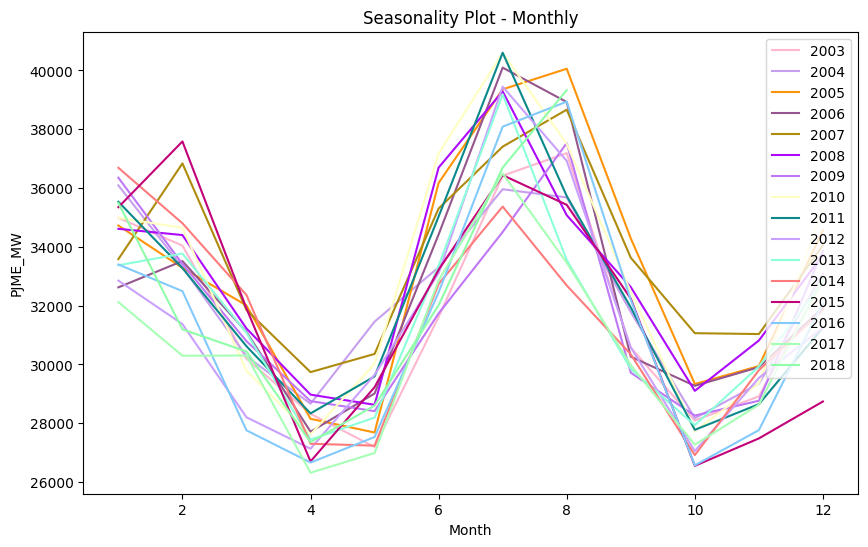

In [50]:
# Monthly Seasonal Plot
import matplotlib
np.random.seed(5)
df_plot = df[['month', 'year', 'PJME_MW']].dropna().groupby(['month', 'year']).mean()[['PJME_MW']].reset_index()
years = df_plot['year'].unique()
colors = np.random.choice(list(matplotlib.colors.XKCD_COLORS.keys()), len(years), replace = False)

# Plot
plt.figure(figsize = (10, 6))
for i, y in enumerate(years):
  if i > 0:
    plt.plot('month', 'PJME_MW',data = df_plot[df_plot['year'] == y], color = colors[i], label = y)

# Setting the labels
plt.title('Seasonality Plot - Monthly')
plt.xlabel('Month')
plt.ylabel('PJME_MW')
plt.legend()
plt.show()

The Monthly Seasonality Plot displays how PMIE (possibly energy consumption or other seasonal data) fluctuates across different months over multiple years from 2003 to 2018.

**Key Conclusions:**

**1.Annual Seasonal Pattern:**
PMIE levels tend to be highest around months 7 and 8 (July and August), indicating increased activity or consumption during mid-year months.
Levels are lowest during months 4 and 5 (April and May), reflecting reduced activity in spring.
There is a consistent dip in PMIE during late spring and early summer, followed by a peak in mid to late summer, showing a clear seasonal cycle.

**2.Year-over-Year Variability:**
While the overall pattern is consistent, the absolute values vary slightly by year, with some years (e.g., 2007, 2008, 2010) having higher overall PMIE, and others (e.g., 2014) showing generally lower levels.
The pattern indicates robustness in seasonal behavior despite year-to-year fluctuations.

**3.Implications for Planning:**
Peak months (July and August) suggest the need for increased resource allocation, staffing, or capacity during summer months.
Off-peak months (April-May) might be optimal for scheduled maintenance or operational cost savings.
Understanding these seasonal trends supports better strategic planning, inventory management, and resource allocation.

**Overall:**
The graph clearly demonstrates a consistent annual seasonal cycle with peaks in mid-year and lows in spring. Harnessing this repetitive pattern can inform scheduling, operational scaling, and resource optimization to align with predictable fluctuations throughout the year.

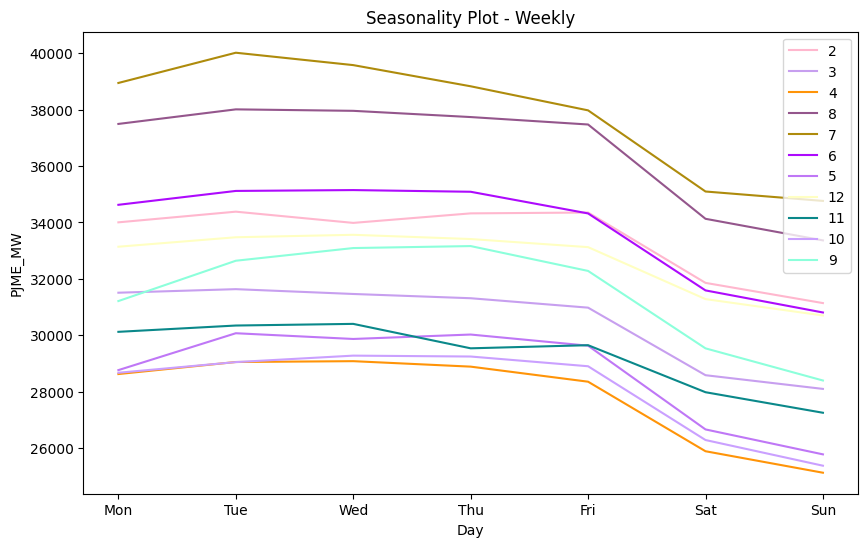

In [51]:
# Weekly Seasonal Plot
import matplotlib
np.random.seed(5)
df_plot = df[['day_str', 'month', 'PJME_MW', 'day_of_week']].dropna().groupby(['day_str', 'month', 'day_of_week']).mean()[['PJME_MW']].reset_index()
df_plot = df_plot.sort_values(by = 'day_of_week', ascending = True)
df_plot = df_plot.drop('day_of_week', axis = 1)
months = df_plot['month'].unique()
colors = np.random.choice(list(matplotlib.colors.XKCD_COLORS.keys()), len(months), replace = False)

# Plot
plt.figure(figsize = (10, 6))
for i, y in enumerate(months):
  if i > 0:
    plt.plot('day_str', 'PJME_MW',data = df_plot[df_plot['month'] == y], color = colors[i], label = y)

# Setting the labels
plt.title('Seasonality Plot - Weekly')
plt.xlabel('Day')
plt.ylabel('PJME_MW')
plt.legend()
plt.show()

The Seasonal Weekly Plot displays how PMIE (possibly a measure of energy, performance, or usage) varies across different days of the week, with multiple lines representing different seasonal or categorical factors.
**Key Conclusions:**

**1.Weekly Pattern:**
PMIE levels are highest on Tuesday and Wednesday, indicating increased activity or consumption midweek.
PMIE is generally lower on Saturday and Sunday, reflecting reduced activity during weekends or lower operational hours.

Trend Across Days:
There is a noticeable decline in PMIE levels from Friday to Sunday, highlighting a weekend effect with reduced activity.
The data shows a consistent pattern of elevated levels during weekdays and decreased levels during weekends.

**3.Impact of Different Seasons or Categories:**

Lines with higher numbers (e.g., 7, 6) indicate higher PMIE levels across days, suggesting certain seasons or categories have generally increased activity.
Conversely, lines toward the bottom (e.g., 9, 10, 11) indicate lower PMIE levels, which may correspond to different operational circumstances or seasonal effects.

**Business and Operational Implications:**
Resource Planning: Increased activity midweek suggests the need for higher staffing or resource allocation on Tuesday and Wednesday.
Weekend Operations: Lower PMIE levels on weekends imply potential for reduced staffing, maintenance, or operational costs.
Seasonal Adjustments: Understanding variations across different categories or seasons enables tailored strategies for marketing, resource management, and service provision.

**Overall:**
The graph emphasizes the importance of considering weekly and seasonal patterns for optimal planning and resource allocation. Aligning operational strategies with these patterns can improve efficiency, reduce costs, and enhance service delivery.

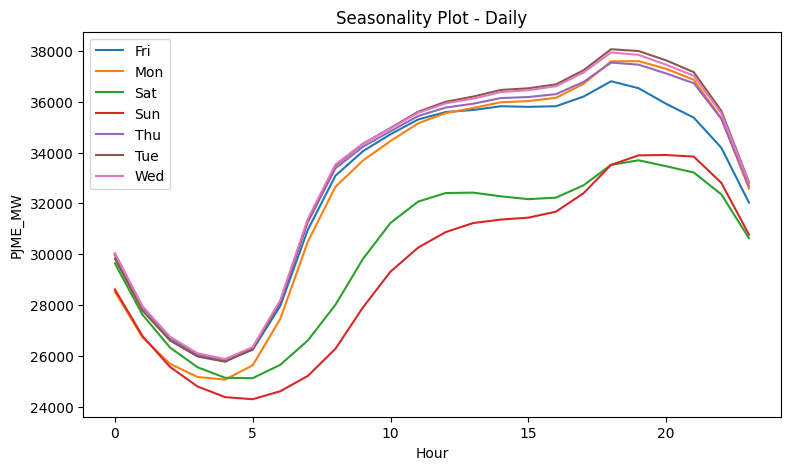

In [52]:
# Daily Seasonal Plot
import matplotlib
np.random.seed(5)
df_plot = df[['hour', 'day_str', 'PJME_MW']].dropna().groupby(['hour', 'day_str']).mean()[['PJME_MW']].reset_index()
df_plot = df_plot.sort_values(by = 'hour', ascending = True)

# Plot using seaborn
plt.figure(figsize = (9, 5))
sns.lineplot(x = 'hour', y = 'PJME_MW', hue = 'day_str', data = df_plot, legend = True)

# Setting the labels
plt.title('Seasonality Plot - Daily')
plt.xlabel('Hour')
plt.ylabel('PJME_MW')
plt.legend()
plt.show()

The graph presented is a seasonal plot showing how PMIE (likely a measurement related to energy or consumption) varies throughout different hours of the day, segmented by days of the week.

**Key Conclusions:**
**1.Daily Pattern of PMIE:**

PMIE tends to be lower during late-night to early morning hours (around 4-7 AM).
It gradually increases from early morning, reaches a peak in the late afternoon to early evening (around 16-18 hours).
There is a decline afterward, indicating less PMIE usage or activity in the late evening and night hours.

**2.Weekly Variations:**
Different days show distinctive patterns:
Monday and Tuesday exhibit higher PMIE levels during peak hours, hinting at increased activity or energy use at the start of the week.

Sunday has comparatively lower PMIE throughout the day, possibly reflecting reduced activity or different operational hours.

Mid-week days like Wednesday and Thursday tend to have similar patterns, suggesting consistency in daily activity during those days.

**3.Implication for Business or Operations:**
Peak times (around 16-18 hours) could be targeted for resource allocation, maintenance, or promotional activities.
Understanding weekly patterns helps optimize staffing, energy consumption, and operational planning aligned with peak and off-peak hours.
The lower activity in early mornings and late nights offers opportunities for scheduled downtimes or energy savings.

**Overall:**
The graph underscores the importance of considering both daily and weekly cycles when planning operational activities, resource management, or energy efficiency measures. By aligning strategies with these patterns, businesses can enhance efficiency, reduce costs, and improve service delivery.

In [53]:
'''
Homework -> Please write conclusions from the above plots
'''

'\nHomework -> Please write conclusions from the above plots\n'

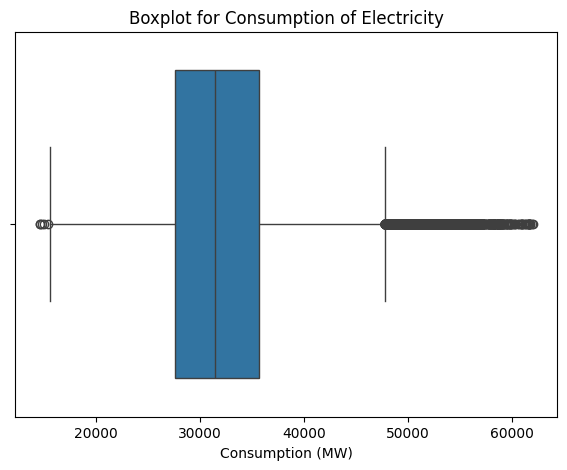

In [54]:
# Boxplot for outliers
plt.figure(figsize = (7, 5))
sns.boxplot(x = 'PJME_MW', data = df)
plt.xlabel('Consumption (MW)')
plt.title(f'Boxplot for Consumption of Electricity')
plt.show()

In [55]:
# Filtering the data
df_plot = df[df['year'] >= 2017].reset_index().sort_values(by = 'Datetime')
df_plot = df_plot.set_index('Datetime')
df_plot.head()

,PJME_MW,year,month,week,day,hour,day_str,year_month,day_of_week
Datetime,,,,,,,,,
2017-01-01 00:00:00,28171.0,2017,1,52,1,0,Sun,2017_1,6
2017-01-01 01:00:00,26879.0,2017,1,52,1,1,Sun,2017_1,6
2017-01-01 02:00:00,25848.0,2017,1,52,1,2,Sun,2017_1,6
2017-01-01 03:00:00,25039.0,2017,1,52,1,3,Sun,2017_1,6
2017-01-01 04:00:00,24637.0,2017,1,52,1,4,Sun,2017_1,6


In [56]:
'''
Time Series -> trend component + seasonal component + noise component
Sometimes, there can be more than 1 seasonal component as well.

There are two main types of decomposition : additive and multiplicative

Additive -> T + S + R
Multiplicative -> T * S * R

Additive decomposition is best suited for scenarios with constant variance
Multiplicative decompostion is best suited for scenarios with non-constant variance
'''

'\nTime Series -> trend component + seasonal component + noise component\nSometimes, there can be more than 1 seasonal component as well.\n\nThere are two main types of decomposition : additive and multiplicative\n\nAdditive -> T + S + R\nMultiplicative -> T * S * R\n\nAdditive decomposition is best suited for scenarios with constant variance\nMultiplicative decompostion is best suited for scenarios with non-constant variance\n'

In [57]:
# Adding new columns
df_plot['PJME_MW - Multiplicative Decompose'] = df_plot['PJME_MW']
df_plot['PJME_MW - Additive Decompose'] = df_plot['PJME_MW']
df_plot.head()

,PJME_MW,year,month,week,day,hour,day_str,year_month,day_of_week,PJME_MW - Multiplicative Decompose,PJME_MW - Additive Decompose
Datetime,,,,,,,,,,,
2017-01-01 00:00:00,28171.0,2017,1,52,1,0,Sun,2017_1,6,28171.0,28171.0
2017-01-01 01:00:00,26879.0,2017,1,52,1,1,Sun,2017_1,6,26879.0,26879.0
2017-01-01 02:00:00,25848.0,2017,1,52,1,2,Sun,2017_1,6,25848.0,25848.0
2017-01-01 03:00:00,25039.0,2017,1,52,1,3,Sun,2017_1,6,25039.0,25039.0
2017-01-01 04:00:00,24637.0,2017,1,52,1,4,Sun,2017_1,6,24637.0,24637.0


In [58]:
# Importing 'seasonal_decompose'
from statsmodels.tsa.seasonal import seasonal_decompose

# Additive Decompostion
result_add = seasonal_decompose(df_plot['PJME_MW - Additive Decompose'], model = 'additive', period = 24*7)

# Multiplicative Decompostion
result_mul = seasonal_decompose(df_plot['PJME_MW - Multiplicative Decompose'], model = 'multiplicative', period = 24*7)

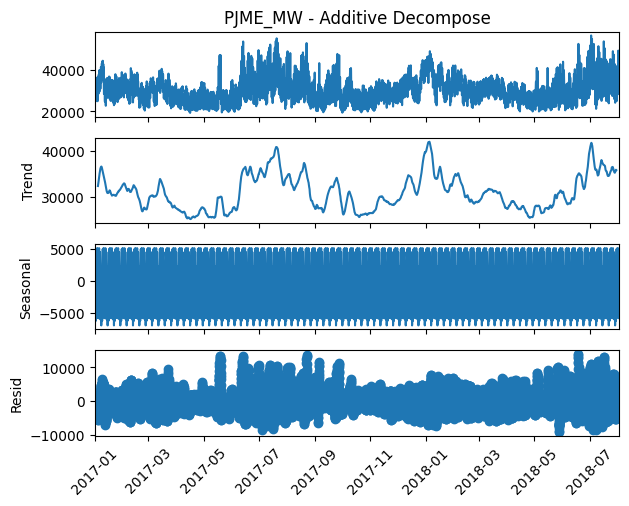

In [59]:
# Plot
result_add.plot().suptitle('', fontsize = 22)
plt.xticks(rotation = 45)
plt.show()

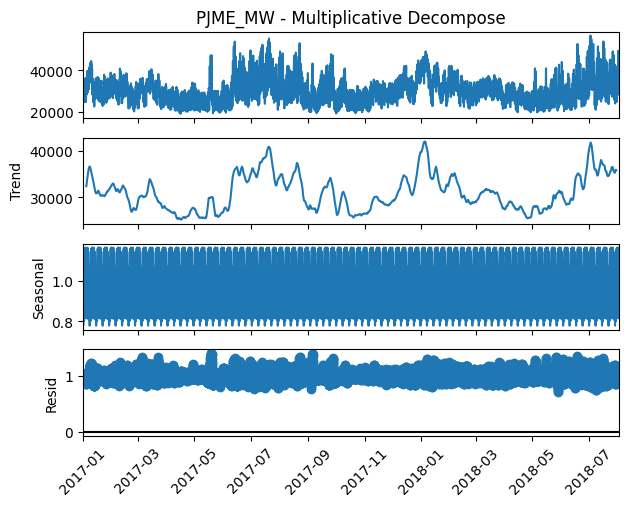

In [60]:
# Plot
result_mul.plot().suptitle('', fontsize = 22)
plt.xticks(rotation = 45)
plt.show()